# Analyzing the Stroop Effect

## by Patrick Bloomingdale
This project is part of Udacity's Data Analyst Nanodegree<br>
**Term:** 2<br>
**Project:** 1<br>
**Due Date:** October 09, 2018

### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

> **CONGRUENT, INCONGRUENT DEFINED**
- **`Congruent Words Condition:`** Color words match the color that is printed<br>
- **`Incongruent Words Condition:`** Color words that `do not` match the color that is printed

**(1) What is the independent variable? What is the dependent variable?**

- **Independent Variable:** Congruent and Incongruent Words Conditions<br>

- **Dependent Variable:** Reaction time `(RT)` of the participant

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

**Null Hypotheses** (**$H_{0}$**): (**$p_{congruent}$**) ≤ (**$p_{incongruent}$**)
> No change in reading time between two reading conditions (congruent vs. Incongruent).<br>
> - The null hypothesis is what we assume to be true before analyzing the data.<br>

**Alternative Hypotheses** (**$H_{1}$**): (**$p_{congruent}$**) < (**$p_{incongruent}$**)
> Congruent word conditions take less time than incongruent word conditions.<br><br>
> - Our alternative hypothesis is what we want to prove to be true. <br>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
# import dataset
df = pd.read_csv('stroopdata.csv')

In [3]:
# look at all columns and rows of the dataset
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
# number of rows in the dataset
df_rows = df.shape[0]
print("There are {} people who took the Stroop Effect Test.".format(df_rows))

There are 24 people who took the Stroop Effect Test.


**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

### Measure of Central Tendency
A measure of central tendency is a summary statistic that represents the center point or typical value of a dataset. These measures indicate where most values in a distribution fall and are also referred to as the central location of a distribution.<br>
In statistics, the three most common measures of central tendency are the `mean`, `median`, and `mode`. Each of these measures calculates the location of the central point using a different method.

In [5]:
# use describe to calculate mean, median(50 percentile), and standard deviation
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
# calculate and print mean, median 
print("Congruent Mean:", df.Congruent.mean())
print("Incongruent Mean:", df.Incongruent.mean())
print("---------------------------------")
print("Congruent Median:", df.Congruent.median())
print("Incongruent Median:", df.Incongruent.median())
print("---------------------------------")
print("DIFFERENCE IN REACTION TIME")
rt_diff = df.Incongruent.mean() - df.Congruent.mean()
print("The Reaction Time (RT) for Congruent is {} seconds faster than incongruent".format(round(rt_diff, 4)))

Congruent Mean: 14.051125
Incongruent Mean: 22.0159166667
---------------------------------
Congruent Median: 14.3565
Incongruent Median: 21.0175
---------------------------------
DIFFERENCE IN REACTION TIME
The Reaction Time (RT) for Congruent is 7.9648 seconds faster than incongruent


- **The average (mean) reaction time for congruent (14.05) is smaller than the average reaction time for incongruent (22.01).**
- **The median (50th Percentile) reaction time for congruent(14.35) is smaller than the average reaction time for incongruent (21.01).**

### Measure of Variability

In [7]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [8]:
# standard deviation
print("Standard Deviation")
df.std()

Standard Deviation


Congruent      3.559358
Incongruent    4.797057
dtype: float64

**(4) Provide two or more visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

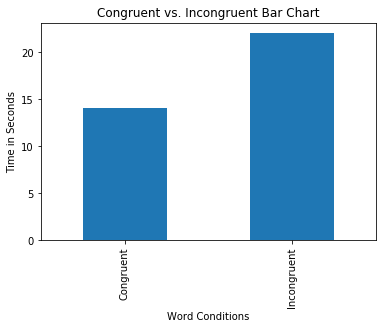

In [9]:
# congruent vs. incongruent bar chart
df.mean().plot('bar');
plt.ylabel('Time in Seconds');
plt.xlabel('Word Conditions');
plt.title('Congruent vs. Incongruent Bar Chart');

> **The bar chart above shows that the congruent reaction times are faster than that of incongreunt reaction times.**

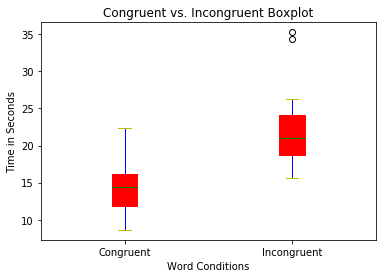

In [10]:
#create colors for boxplot
color = dict(boxes='r', whiskers='b', medians="g", caps="y" )

# Set columns to lists to use in ttest function
congruent = df.Congruent.values.tolist()
incongruent = df.Incongruent.values.tolist()

#combine these different collections into a list
data_to_plot = [congruent, incongruent]

#boxplot - add patch_artist=True to get fill color
bp = df.plot.box(data_to_plot, color=color, patch_artist=True);
    
plt.ylabel('Time in Seconds');
plt.xlabel('Word Conditions');
plt.title('Congruent vs. Incongruent Boxplot');

> **The boxplot above shows that the congruent reaction times are faster than that of incongreunt reaction times.**
- You can also see two outliers for the Incongruent Word Conditions

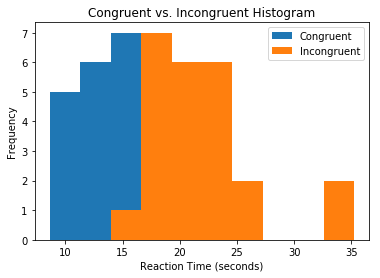

In [11]:
plt.figure();
df.plot.hist();
plt.xlabel('Reaction Time (seconds)');
plt.title('Congruent vs. Incongruent Histogram');
plt.legend();
plt.show();

> **The histograms show that the congruent reaction times were faster than incongruent.**
- Agan, you can see that Incongruent Word Conditions has two outliers.

**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations?**

**Statistical Test**: Paired T-Test
>I will use a Paired T-Test since we are doing a comparison of two different conditions (congruent vs. incongruent) where the conditions are applied to the same subjects.

In [12]:
# Perform ttest
# paired, pvalue > 0.05, accept null hypothesis
tstat, pvalue = stats.ttest_rel(df['Incongruent'],df['Congruent'],axis=0)
print("T-Statistic:", tstat)
print("P-Value:", pvalue)

T-Statistic: 8.02070694411
P-Value: 4.10300058571e-08


In [13]:
# 1 sample t-test with difference, same result as stats.ttest_rel
stats.ttest_1samp(df.Incongruent - df.Congruent, 0)

Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

**T-STATISTICS**<br>
The t-statistic that results from a paired t-test is 8.0207. <br>
<br>
**P-VALUE**<br>
The p-value that results from a paired t-test is 0.0000000410300058571.<br>

>**Based on the results above, and using a 5% level for statistical significance:**
- Since the p-value is less than 0.05, we reject the null hypothesis.
- Small p-values are associated with large t-statistics.

**(6) What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

**ALTERNATIVE VERSION OF THE STROOP EFFECT**
There are plenty of alternative versions of adaptations of the stoop effect.  Below is the summary and link to a couple of publications  that would result in a similar effect.

**1.** `Automatic Processing of Psychological Distance: Evidence From a Stroop Task`<br>
**Abstract**<br>
A picture–word version of the Stroop task was used to test the automatic activation of psychological distance by words carrying various senses of psychological distance: temporal (tomorrow, in a year), social (friend, enemy), and hypotheticality (sure, maybe). The pictures implied depth, with the words appearing relatively close to or distant from the observer. The participants classified the spatial distance of words faster when the word’s implicit psychological distance matched its spatial distance (e.g., a geographically close word was classified faster when it was “friend” than when it was “enemy”). The findings are consistent with the idea that psychological distance is accessed automatically, even when it is not directly related to people’s current goals, and suggest that psychological distance is an important dimension of meaning, common to spatial distance, temporal distance, social distance, and hypotheticality.<br>
http://www.psych.nyu.edu/tropelab/publications/Bar-Ananetal2007.pdf

**2.** `The Reverse Stroop Effect`<br>
**Abstract**<br>
In classic Stroop interference, manual or oral identification of sensory colors presented as incongruent color words is delayed relative to simple color naming. In the experiment reported here, this effect was shown to all but disappear when the response was simply to point to a matching patch of color. Conversely, strong Reverse Stroop interference occurred with the pointing task. That is, when the sensory color of a color word was incongruent with that word, responses to color words were delayed by an average of 69 msec relative to a word presented in gray. Thus, incongruently-colored words interfere strongly with pointing to a color patch named by the words, but little interference from incongruent color words is found when the goal is to match the color of the word. These results suggest that Stroop effects arise from response compatibility of irrelevant information rather than automatic processing or habit strength.<br>
http://www.swarthmore.edu/SocSci/fdurgin1/ReverseStroop/PBRStroop.html


In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test a Perceptual Phenomenon.ipynb'])

0